In [81]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats  # 과학용 계산 라이브러리

In [82]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

df = pd.read_csv("C:/Users/82108/Desktop/iris/iris.data", header=None)
df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'class'] 
df

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [83]:
# 'Name' 열 삭제
df = df.drop(columns=['class'])

# 수정된 DataFrame 확인
print(df.head())

   sepal length  sepal width  petal length  petal width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2


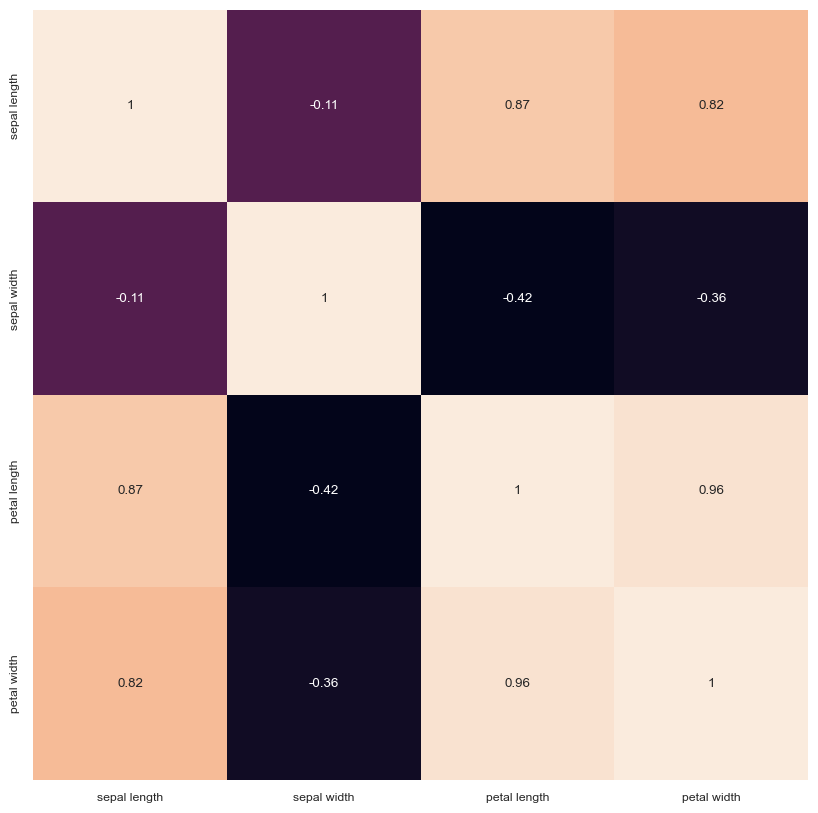

In [84]:
#상관 관계 행렬
# 0.3 이상인 경우 상관관계가 있고, 0.7이상이면 아주 높음

df_corr=df.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [86]:
X = df.drop('sepal width',axis=1)
X.head()

,sepal length,petal length,petal width
0,5.1,1.4,0.2
1,4.9,1.4,0.2
2,4.7,1.3,0.2
3,4.6,1.5,0.2
4,5.0,1.4,0.2


In [87]:
y = df['sepal length']
y.head()

0    5.1
1    4.9
2    4.7
3    4.6
4    5.0
Name: sepal length, dtype: float64

In [88]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X,
                                                  y,
                                                  test_size=0.2,
                                                  shuffle=True,
                                                  random_state=12)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(120, 3) (120,)
(30, 3) (30,)


In [89]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)
ly_preds = model.predict(X_test)

print('평균제곱근오차', mean_squared_error(ly_preds, y_test))

def mse_np(actual, predicted):
    return np.mean((np.array(actual) - np.array(predicted)) ** 2)

print('평균제곱근오차', mse_np(ly_preds, y_test))

def mse(actual, predicted):
    sum_square_error = sum((a - p) ** 2 for a, p in zip(actual, predicted))
    mean_square_error = sum_square_error / len(actual)
    return mean_square_error

print('평균제곱근오차', mse(ly_preds, y_test))

평균제곱근오차 3.6813508910313885e-31
평균제곱근오차 3.6813508910313885e-31
평균제곱근오차 3.6813508910313885e-31


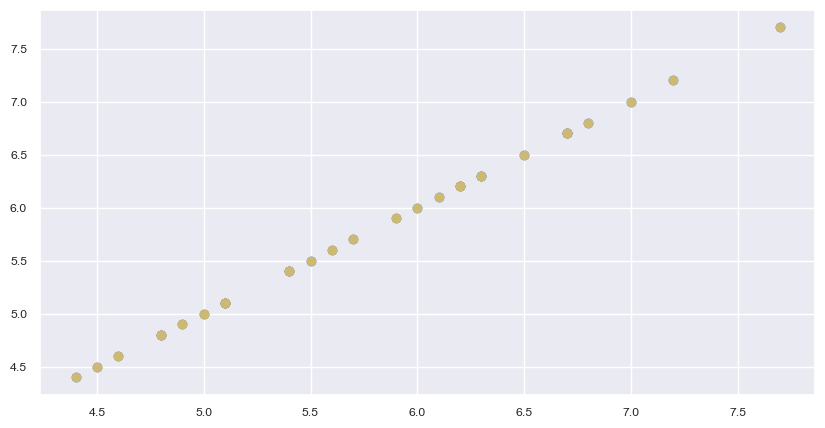

In [90]:
# 예측값과 실제 값 차이를 산접도로 표시, 노란색 예측

plt.figure(figsize=(10,5))
plt.scatter(X_test['sepal length'], y_test, label='y_test')
plt.scatter(X_test['sepal length'], ly_preds, c='y', label='ly_preds')
#plt.plot(X_train, lr.predict(X_train), color='blue')
plt.show()      

In [91]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

dy_preds = model.predict(X_test)
print('평균제곱근오차', mean_squared_error(dy_preds, y_test))

평균제곱근오차 0.000666666666666662


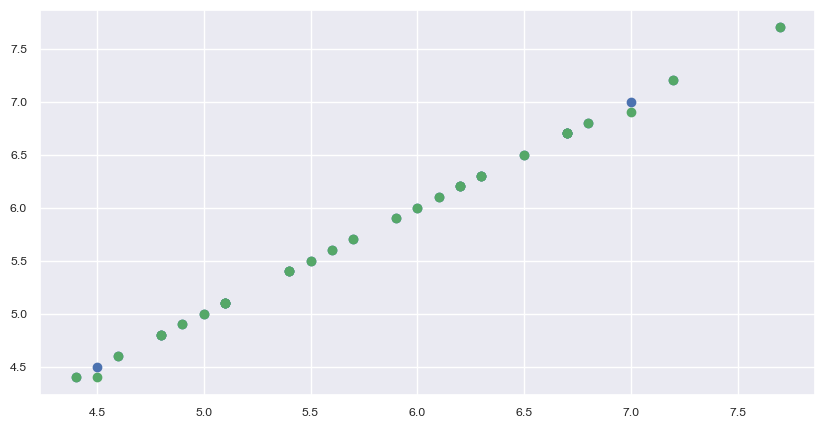

In [92]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['sepal length'], y_test, label='y_test')
plt.scatter(X_test['sepal length'], dy_preds, c='g', label='dy_preds')
plt.show()         

In [93]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

ry_preds = model.predict(X_test)
print('평균제곱근오차', mean_squared_error(ry_preds, y_test))

평균제곱근오차 0.001831366666666831


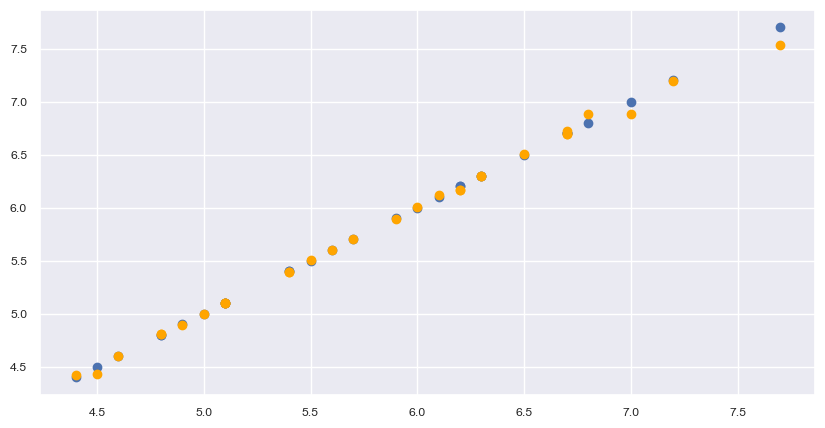

In [94]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['sepal length'], y_test, label='y_test')
plt.scatter(X_test['sepal length'], ry_preds, c='orange', label='ry_preds')

plt.show()       

In [95]:
from sklearn.svm import SVR

model = SVR(kernel='linear')
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

ry_preds = model.predict(X_test)
print('평균제곱근오차', mean_squared_error(ry_preds, y_test))

평균제곱근오차 0.0018176106013376092


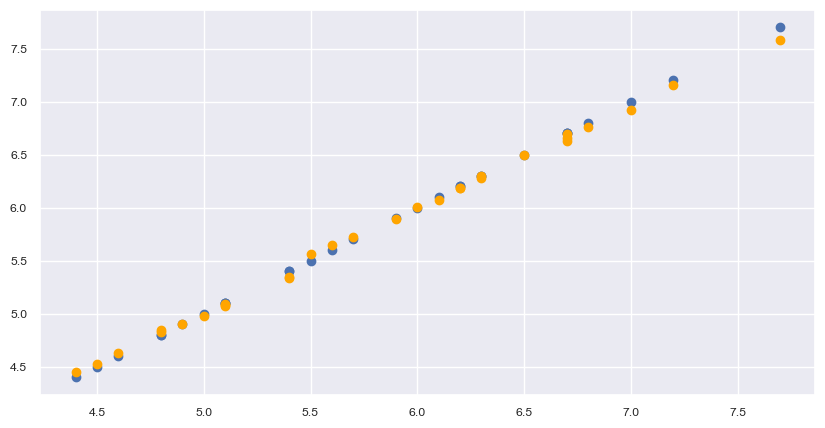

In [96]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['sepal length'], y_test, label='y_test')
plt.scatter(X_test['sepal length'], ry_preds, c='orange', label='ry_preds')

plt.show()   